# Get all necesarry Finance Data and combine on one Frame

### get Data from Yahoo Finance Data

In [93]:
import yfinance as yf

# S&P 500 Index from Yahoo Finance
sp500 = yf.Ticker("^GSPC")

# Download historical data for the last 15 years
sp500_data = sp500.history(period="15y", interval="1d")

#print the first few rows of the data
print(sp500_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2010-05-10 00:00:00-04:00  1122.270020  1163.849976  1122.270020  1159.729980   
2010-05-11 00:00:00-04:00  1156.390015  1170.479980  1147.709961  1155.790039   
2010-05-12 00:00:00-04:00  1155.430054  1172.869995  1155.430054  1171.670044   
2010-05-13 00:00:00-04:00  1170.040039  1173.569946  1156.140015  1157.439941   
2010-05-14 00:00:00-04:00  1157.189941  1157.189941  1126.140015  1135.680054   

                               Volume  Dividends  Stock Splits  
Date                                                            
2010-05-10 00:00:00-04:00  6893700000        0.0           0.0  
2010-05-11 00:00:00-04:00  5842550000        0.0           0.0  
2010-05-12 00:00:00-04:00  5225460000        0.0           0.0  
2010-05-13 00:00:00-04:00  4870640000        0.0           0.0  
2010-05-14 00:00:00-04:00  6126400000     

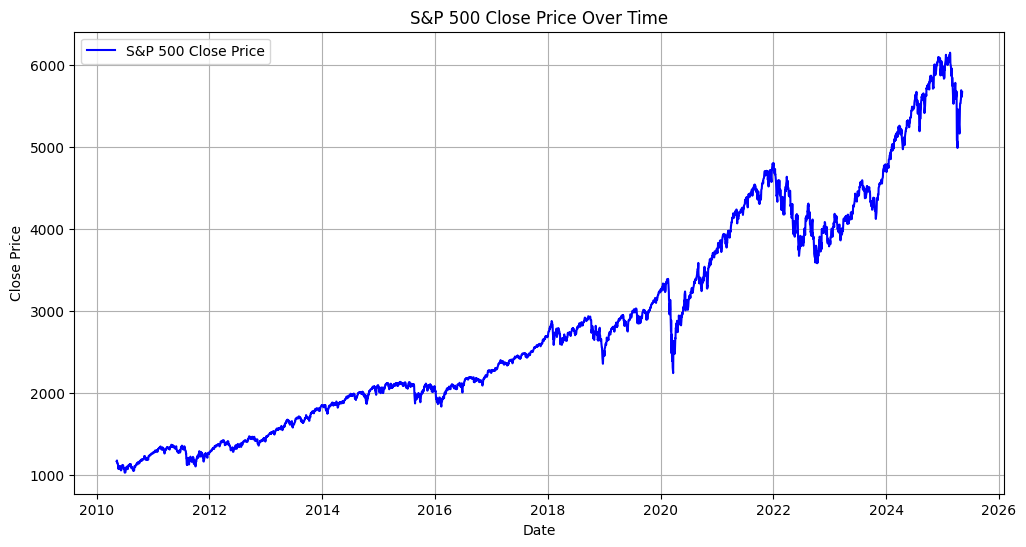

In [94]:
import matplotlib.pyplot as plt

# Plot the 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Close'], label='S&P 500 Close Price', color='blue')
plt.title('S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### get Bitcoin Data from Yahoo Finance

In [95]:
# Bitcoin data from Yahoo Finance
btc = yf.Ticker("BTC-USD")

# Download historical data for the last 15 years
btc_data = btc.history(period="15y", interval="1d")

# Display the first rows of the data
print(btc_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

                             Volume  Dividends  Stock Splits  
Date                                                          
2014-09-17 00:00:00+00:00  21056800        0.0           0.0  
2014-09-18 00:00:00+00:00  34483200        0.0           0.0  
2014-09-19 00:00:00+00:00  37919700        0.0           0.0  
2014-09-20 00:00:00+00:00  36863600        0.0           0.0  
2014-09-21 00:00:00+00:00  26580100        0.0           0.0  


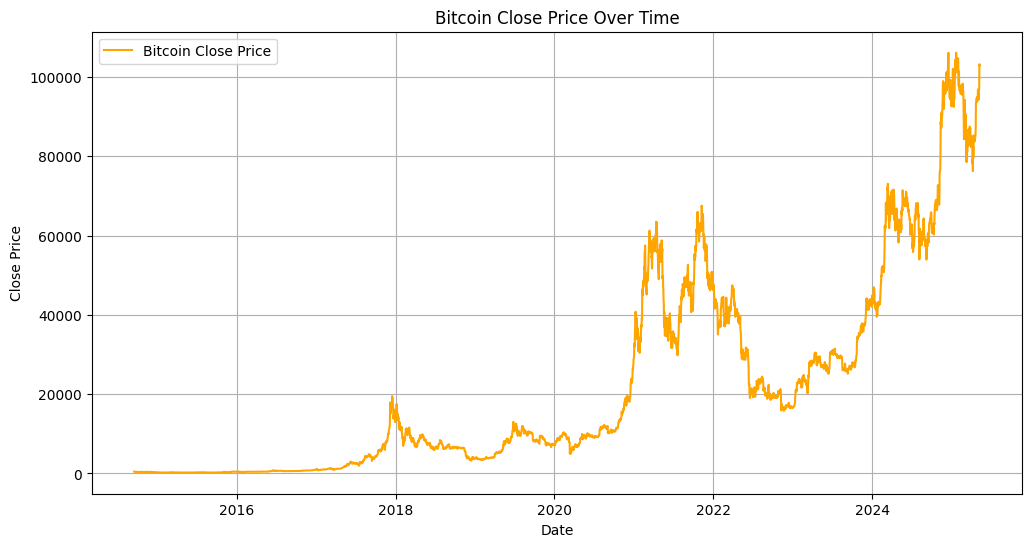

In [96]:
# Plot the 'Close' prices of Bitcoin over time
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], label='Bitcoin Close Price', color='orange')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Get the NASDAQ Data from Yahoo Finance

In [97]:
# NASDAQ data from Yahoo Finance
nasdaq = yf.Ticker("^IXIC")

# Download historical data for the last 15 years
nasdaq_data = nasdaq.history(period="15y", interval="1d")

# Display the first rows of the data
print(nasdaq_data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2010-05-10 00:00:00-04:00  2365.969971  2379.870117  2349.399902  2374.669922   
2010-05-11 00:00:00-04:00  2347.699951  2405.260010  2345.500000  2375.310059   
2010-05-12 00:00:00-04:00  2388.639893  2426.469971  2384.689941  2425.020020   
2010-05-13 00:00:00-04:00  2416.360107  2434.290039  2387.590088  2394.360107   
2010-05-14 00:00:00-04:00  2373.879883  2374.530029  2323.629883  2346.850098   

                               Volume  Dividends  Stock Splits  
Date                                                            
2010-05-10 00:00:00-04:00  2871800000        0.0           0.0  
2010-05-11 00:00:00-04:00  2548840000        0.0           0.0  
2010-05-12 00:00:00-04:00  2351900000        0.0           0.0  
2010-05-13 00:00:00-04:00  2375250000        0.0           0.0  
2010-05-14 00:00:00-04:00  2653020000     

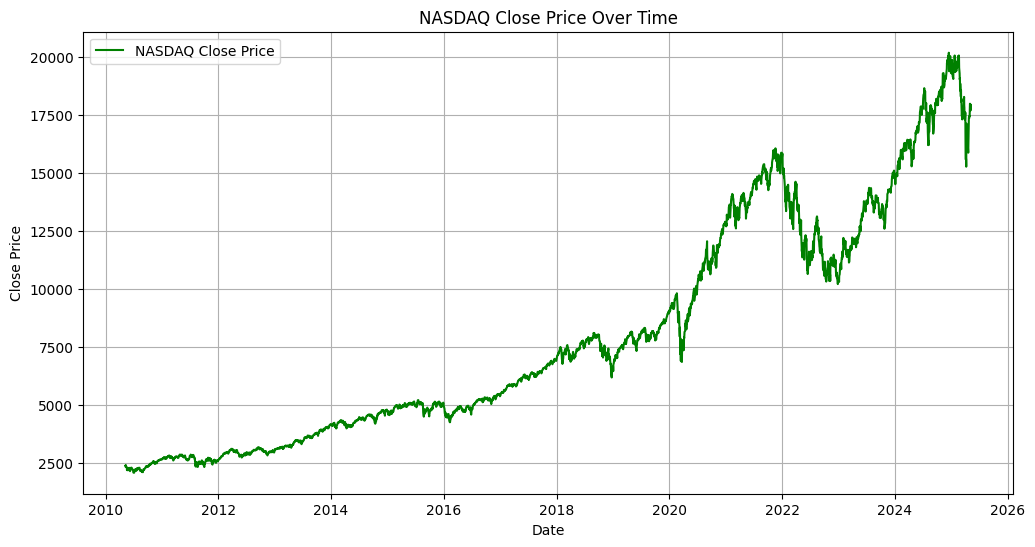

In [98]:
# Plot the 'Close' prices of NASDAQ over time
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_data.index, nasdaq_data['Close'], label='NASDAQ Close Price', color='green')
plt.title('NASDAQ Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### combine in one Dataset

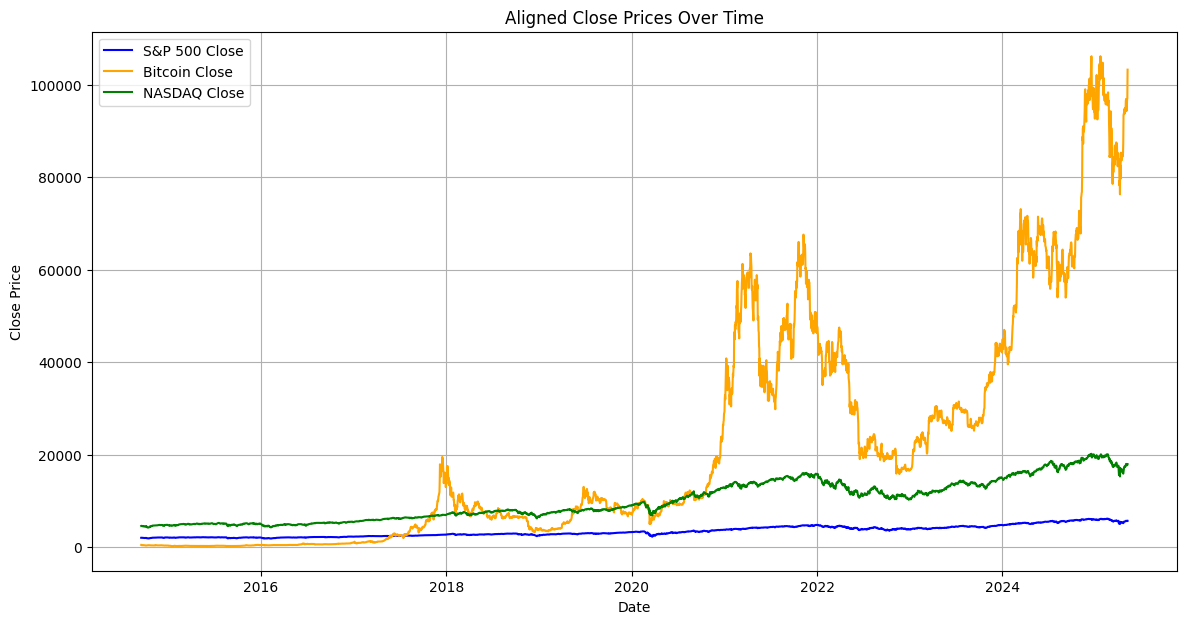

In [99]:
import pandas as pd

sp500_data.index = pd.to_datetime(sp500_data.index).tz_localize(None).normalize()
btc_data.index = pd.to_datetime(btc_data.index).tz_localize(None).normalize()
nasdaq_data.index = pd.to_datetime(nasdaq_data.index).tz_localize(None).normalize()



# Ensure all datasets have the same date range
start_date = max(sp500_data.index.min(), btc_data.index.min(), nasdaq_data.index.min())
end_date = min(sp500_data.index.max(), btc_data.index.max(), nasdaq_data.index.max())
sp500_data = sp500_data[(sp500_data.index >= start_date) & (sp500_data.index <= end_date)]
btc_data = btc_data[(btc_data.index >= start_date) & (btc_data.index <= end_date)]
nasdaq_data = nasdaq_data[(nasdaq_data.index >= start_date) & (nasdaq_data.index <= end_date)]

# Rename columns to avoid collision
sp500_data = sp500_data.rename(columns={'Close': 'sp500_close', 'Volume': 'sp500_volume'})
btc_data = btc_data.rename(columns={'Close': 'bitcoin_close', 'Volume': 'bitcoin_volume'})
nasdaq_data = nasdaq_data.rename(columns={'Close': 'nasdaq_close', 'Volume': 'nasdaq_volume'})

# Plot the adjusted datasets to ensure alignment
plt.figure(figsize=(14, 7))
plt.plot(sp500_data.index, sp500_data['sp500_close'], label='S&P 500 Close', color='blue')
plt.plot(btc_data.index, btc_data['bitcoin_close'], label='Bitcoin Close', color='orange')
plt.plot(nasdaq_data.index, nasdaq_data['nasdaq_close'], label='NASDAQ Close', color='green')
plt.title('Aligned Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Merge on Close prices
combined_data_close = pd.merge(
    sp500_data[['sp500_close']], btc_data[['bitcoin_close']],
    left_index=True, right_index=True, how='outer'
)
combined_data_close = pd.merge(
    combined_data_close, nasdaq_data[['nasdaq_close']],
    left_index=True, right_index=True, how='outer'
)

# Merge on Volume
combined_data_volume = pd.merge(
    sp500_data[['sp500_volume']], btc_data[['bitcoin_volume']],
    left_index=True, right_index=True, how='outer'
)
combined_data_volume = pd.merge(
    combined_data_volume, nasdaq_data[['nasdaq_volume']],
    left_index=True, right_index=True, how='outer'
)

# Output
print(combined_data_volume.head())


            sp500_volume  bitcoin_volume  nasdaq_volume
Date                                                   
2014-09-17  3.209420e+09        21056800   1.796710e+09
2014-09-18  3.235340e+09        34483200   1.774840e+09
2014-09-19  4.880220e+09        37919700   3.178490e+09
2014-09-20           NaN        36863600            NaN
2014-09-21           NaN        26580100            NaN


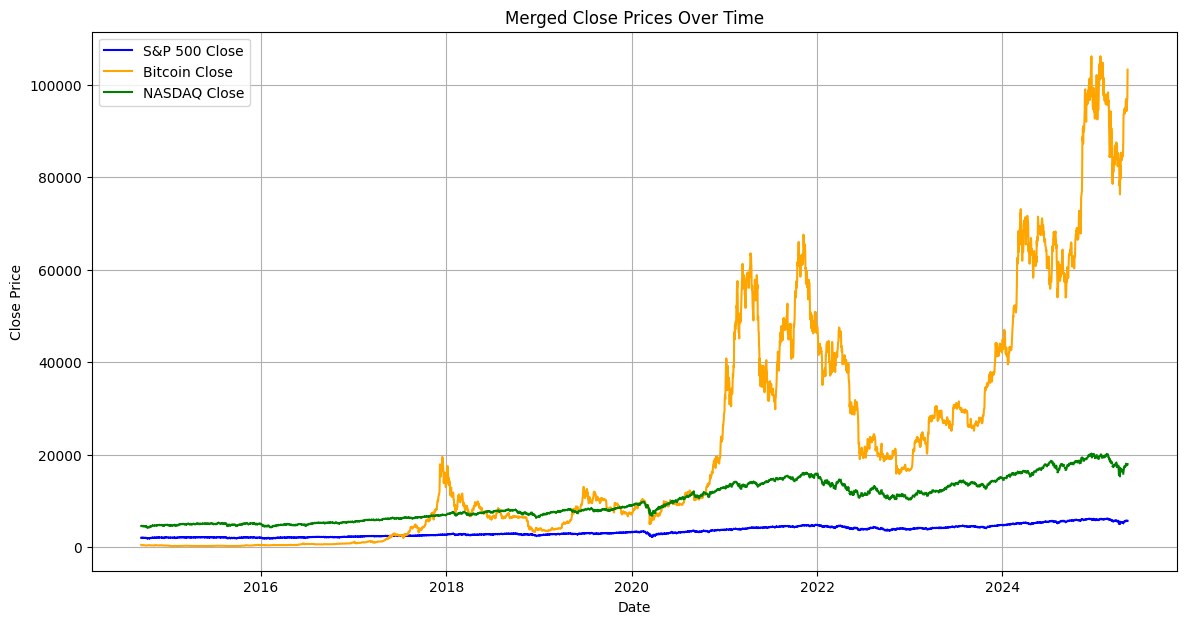

In [101]:
# Plot the merged close prices
plt.figure(figsize=(14, 7))
plt.plot(combined_data_close.index, combined_data_close['sp500_close'], label='S&P 500 Close', color='blue')
plt.plot(combined_data_close.index, combined_data_close['bitcoin_close'], label='Bitcoin Close', color='orange')
plt.plot(combined_data_close.index, combined_data_close['nasdaq_close'], label='NASDAQ Close', color='green')
plt.title('Merged Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# Merge close prices and volume data on time
merged_data = pd.merge(
    combined_data_close, combined_data_volume,
    left_index=True, right_index=True, how='outer'
)

# Display the first few rows of the merged data
print(merged_data.head())

            sp500_close  bitcoin_close  nasdaq_close  sp500_volume  \
Date                                                                 
2014-09-17  2001.569946     457.334015   4562.189941  3.209420e+09   
2014-09-18  2011.359985     424.440002   4593.430176  3.235340e+09   
2014-09-19  2010.400024     394.795990   4579.790039  4.880220e+09   
2014-09-20          NaN     408.903992           NaN           NaN   
2014-09-21          NaN     398.821014           NaN           NaN   

            bitcoin_volume  nasdaq_volume  
Date                                       
2014-09-17        21056800   1.796710e+09  
2014-09-18        34483200   1.774840e+09  
2014-09-19        37919700   3.178490e+09  
2014-09-20        36863600            NaN  
2014-09-21        26580100            NaN  


### output everything as csv

In [103]:
# Save all datasets to CSV files
merged_data.to_csv("financeData_target_variables.csv")